In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [13]:
df = pd.read_csv(r'C:\Users\test\Documents\3rd year - 2nd sem\FDM\Mini Project\housing - filtering.csv')

In [15]:
#Data Set Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345202 entries, 0 to 345201
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       345202 non-null  int64  
 1   url                      345202 non-null  object 
 2   region                   345202 non-null  object 
 3   region_url               345202 non-null  object 
 4   price                    345202 non-null  int64  
 5   type                     345202 non-null  object 
 6   sqfeet                   345202 non-null  int64  
 7   beds                     345202 non-null  int64  
 8   baths                    345202 non-null  float64
 9   cats_allowed             345202 non-null  int64  
 10  dogs_allowed             345202 non-null  int64  
 11  smoking_allowed          345202 non-null  int64  
 12  wheelchair_access        345202 non-null  int64  
 13  electric_vehicle_charge  345202 non-null  int64  
 14  come

In [17]:
#Check Null Values before removing null values in the Data Set(Before Removing Null Values)
df.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             69514
parking_options            130567
image_url                       0
description                     2
lat                          1442
long                         1442
state                           0
dtype: int64

In [18]:
#Removing all Null values 
df =df.dropna()

In [19]:
#Check Null Values in the Data Set After Removing Null Values
df.isnull().sum()

id                         0
url                        0
region                     0
region_url                 0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
image_url                  0
description                0
lat                        0
long                       0
state                      0
dtype: int64

In [20]:
#State(CHECK UNIQUE VALUES)
df.state.unique()

array(['ca', 'co', 'ct', 'dc', 'fl', 'de', 'ga', 'hi', 'id', 'il', 'in',
       'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma', 'mi', 'mn', 'ms', 'nc',
       'mo', 'mt', 'ne', 'nv', 'nj', 'nm', 'ny', 'nh', 'oh', 'nd', 'ok',
       'or', 'pa', 'ri', 'sc', 'tn', 'sd', 'tx', 'ut', 'va', 'vt', 'wa',
       'wv', 'wi', 'wy', 'al', 'ak', 'az', 'ar'], dtype=object)

In [21]:
df.parking_options.unique()

array(['carport', 'attached garage', 'off-street parking',
       'detached garage', 'street parking', 'no parking', 'valet parking'],
      dtype=object)

In [22]:
df.laundry_options.unique()

array(['w/d in unit', 'w/d hookups', 'laundry on site', 'laundry in bldg',
       'no laundry on site'], dtype=object)

In [23]:
df.type.unique()

array(['apartment', 'condo', 'duplex', 'townhouse'], dtype=object)

In [24]:
df.region.unique()

array(['reno / tahoe', 'sacramento', 'boulder', 'santa barbara',
       'SF bay area', 'ventura county', 'san diego', 'san luis obispo',
       'santa maria', 'siskiyou county', 'stockton', 'visalia-tulare',
       'colorado springs', 'yuba-sutter', 'susanville', 'denver',
       'fort collins / north CO', 'hartford', 'new haven', 'eastern CT',
       'western slope', 'washington, DC', 'ft myers / SW florida',
       'high rockies', 'jacksonville', 'daytona beach', 'pueblo',
       'eastern CO', 'northwest CT', 'delaware', 'florida keys',
       'gainesville', 'heartland florida', 'lakeland', 'north central FL',
       'ocala', 'orlando', 'panama city', 'pensacola', 'south florida',
       'okaloosa / walton', 'space coast', 'tallahassee',
       'sarasota-bradenton', 'tampa bay area', 'atlanta', 'augusta',
       'brunswick', 'athens', 'albany', 'treasure coast', 'st augustine',
       'macon / warner robins', 'columbus', 'northwest GA',
       'savannah / hinesville', 'hawaii', 'stat

In [25]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['state']=le.fit(df['state']).transform(df['state'])
df['parking_options']=le.fit(df['parking_options']).transform(df['parking_options'])
df['laundry_options']=le.fit(df['laundry_options']).transform(df['laundry_options'])
df['type']=le.fit(df['type']).transform(df['type'])

In [26]:
df["pets_allowed"] = df["cats_allowed"] + df["dogs_allowed"]

In [27]:
df.pets_allowed[df.pets_allowed == 2] = 1

C:\Users\test\AppData\Local\Temp\ipykernel_12908\1713055787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.pets_allowed[df.pets_allowed == 2] = 1


In [28]:
df.pets_allowed.unique()

array([1, 0], dtype=int64)

In [29]:
df = df.drop(columns =["region_url","region","url","lat","long","description","image_url","id","cats_allowed","dogs_allowed"])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208166 entries, 0 to 345201
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    208166 non-null  int64  
 1   type                     208166 non-null  int32  
 2   sqfeet                   208166 non-null  int64  
 3   beds                     208166 non-null  int64  
 4   baths                    208166 non-null  float64
 5   smoking_allowed          208166 non-null  int64  
 6   wheelchair_access        208166 non-null  int64  
 7   electric_vehicle_charge  208166 non-null  int64  
 8   comes_furnished          208166 non-null  int64  
 9   laundry_options          208166 non-null  int32  
 10  parking_options          208166 non-null  int32  
 11  state                    208166 non-null  int32  
 12  pets_allowed             208166 non-null  int64  
dtypes: float64(1), int32(4), int64(8)
memory usage: 19.1 MB


In [31]:
df.baths.unique()

array([ 2. ,  1. ,  3. ,  1.5,  2.5,  0. ,  5. ,  3.5,  4. ,  4.5, 75. ,
        5.5,  8. ,  6. ])

In [32]:
df["baths"] = df["baths"].astype(int)

<AxesSubplot: xlabel='state'>

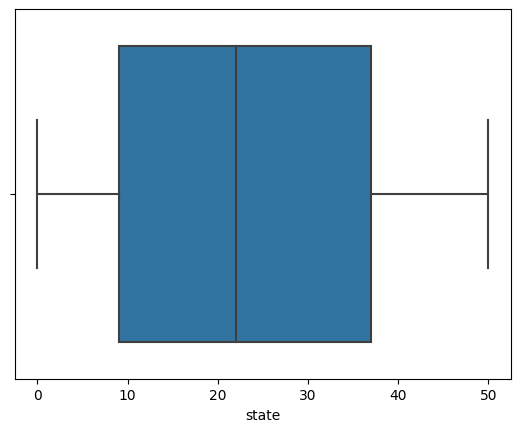

In [33]:
sns.boxplot(x=df['state'])

In [34]:
index_names = df[ (df['state'] >= 38) | (df['state'] <= 9)].index

df.drop(index_names, inplace = True)

In [35]:
df.state.unique()

array([10, 11, 13, 14, 15, 12, 16, 17, 18, 21, 20, 19, 22, 23, 25, 27, 24,
       26, 29, 33, 31, 32, 34, 30, 35, 28, 36, 37])

In [36]:
beds = df[ (df['beds'] > 8 )].index
df.drop(beds, inplace = True)

In [37]:
df.drop(df.index[df['baths'] == 0.0], inplace = True)

df.drop(df.index[df['beds'] == 0], inplace = True)

# using np.ceil to round to
df['baths'] = df['baths'].apply(np.ceil)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98081 entries, 44835 to 222463
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    98081 non-null  int64  
 1   type                     98081 non-null  int32  
 2   sqfeet                   98081 non-null  int64  
 3   beds                     98081 non-null  int64  
 4   baths                    98081 non-null  float64
 5   smoking_allowed          98081 non-null  int64  
 6   wheelchair_access        98081 non-null  int64  
 7   electric_vehicle_charge  98081 non-null  int64  
 8   comes_furnished          98081 non-null  int64  
 9   laundry_options          98081 non-null  int32  
 10  parking_options          98081 non-null  int32  
 11  state                    98081 non-null  int32  
 12  pets_allowed             98081 non-null  int64  
dtypes: float64(1), int32(4), int64(8)
memory usage: 9.0 MB


In [40]:
df.to_csv('Preprocessing.csv',index=False) 